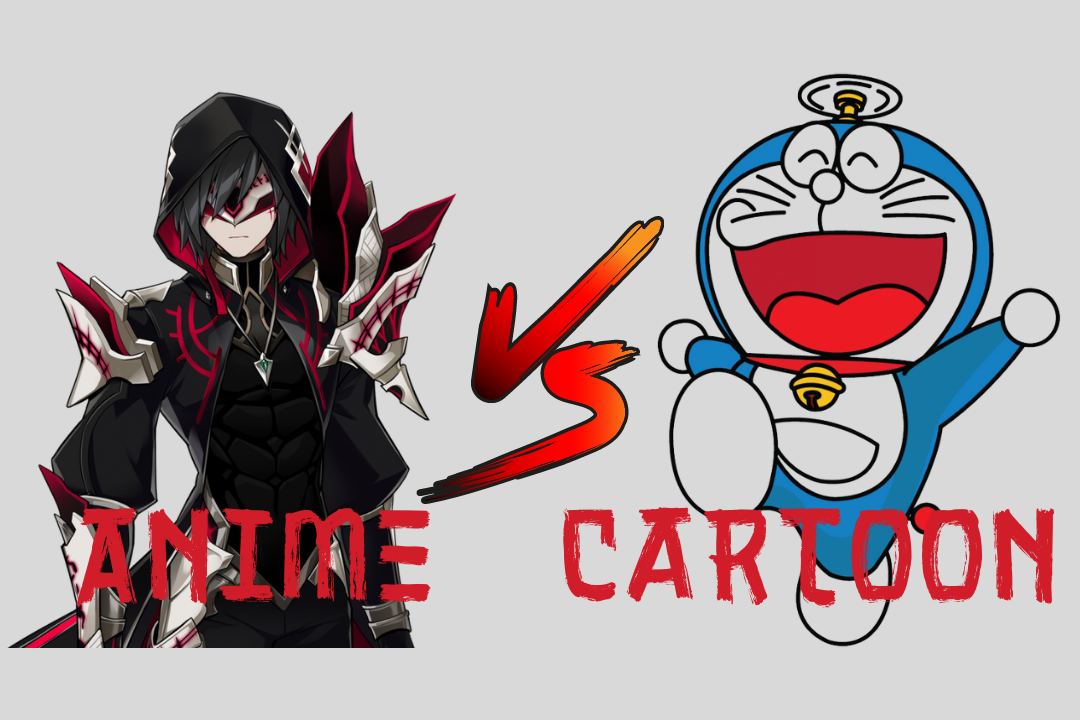

In [1]:
# Importing the required libraries
import os
import numpy as np
import cv2
import matplotlib.pyplot as plt
import random
import tensorflow as tf
from tensorflow import keras

I have scrapped images from google and uploaded it on drive. <br>
Access it using - https://drive.google.com/drive/folders/1NkQK7SrPRvbmdgMTEsJQ5-i-oY4kzVLL?usp=sharing

In [2]:
# lets read all the images
anime_path = './Training Data/Anime/'

X = []
y = []

# The label for Anime is 0 and for Cartoon, it is 1

for folder in os.scandir(anime_path):
    for file in os.scandir(anime_path + folder.name):
        img = cv2.imread(anime_path + folder.name + '/' + file.name, cv2.IMREAD_COLOR)
        img = cv2.resize(img, (128, 128))
        img = np.array(img, dtype='float32')
        img/=255
        X.append(img)
        y.append(0)

In [3]:
print("Number of Images of Anime = ", len(X))

Number of Images of Anime =  4451


In [4]:
cartoon_path = './Training Data/Cartoon/'

for folder in os.scandir(cartoon_path):
    for file in os.scandir(cartoon_path + folder.name):
        img = cv2.imread(cartoon_path + folder.name + '/' + file.name, cv2.IMREAD_COLOR)
        img = cv2.resize(img, (128, 128))
        img = np.array(img, dtype='float32')
        img/=255
        X.append(img)
        y.append(1)

In [5]:
print("Number of Images of Cartoon = ", len(X)-4451)

Number of Images of Cartoon =  4697


In [6]:
# converting the images to a numpy array for easy processing
X = np.array(X)
y = np.array(y)

In [7]:
# this is how the shape of our images look like
X.shape

(9148, 128, 128, 3)

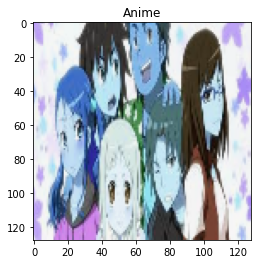

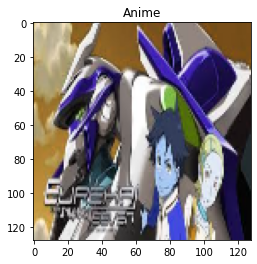

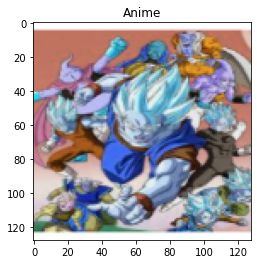

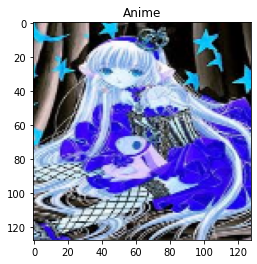

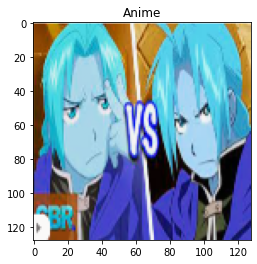

In [8]:
# lets plot 5 random images

labels = {0:'Anime', 1:'Cartoon'}

for i in range(5):
    n = random.randint(0, 9148)
    plt.figure()
    plt.title(labels[y[n]])
    plt.imshow(X[n])

In [9]:
from sklearn.model_selection import train_test_split

In [10]:
# lets take 80% of the data for training
# 10% for validating and 10% for testing
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, stratify=y, shuffle=True)
X_val, X_test, y_val, y_test = train_test_split(X_val, y_val, test_size=0.5, stratify=y_val)

In [11]:
print("Training data samples = ", len(y_train))

Training data samples =  7318


In [12]:
print("Testing and Validating data samples = ", len(y_test), " (each)")

Testing and Validating data samples =  915  (each)


In [13]:
model = keras.Sequential([
    keras.layers.Conv2D(filters=32, kernel_size=(2,2), activation='relu', input_shape=(128, 128, 3)),
    keras.layers.MaxPooling2D((4,4)),
    
    keras.layers.ZeroPadding2D(padding=(1,1)), # to give value to features at the corners
    keras.layers.Conv2D(filters=64, kernel_size=(3,3), activation='relu', padding='valid'),
    keras.layers.MaxPooling2D((3,3)),
    keras.layers.Dropout(0.3), # for regularization
    
    keras.layers.Conv2D(filters=64, kernel_size=(4,4), activation='relu', padding='same'),
    keras.layers.Conv2D(filters=128, kernel_size=(5,5), activation='relu', padding='same'),
    keras.layers.MaxPooling2D((2,2)),
    keras.layers.Dropout(0.4),
    
    keras.layers.Conv2D(filters=128, kernel_size=(5,5), activation='relu', padding='same'),
    keras.layers.MaxPooling2D((2,2)),
    keras.layers.Dropout(0.5),
    
    keras.layers.Flatten(), # flattening for feeding into ANN
    keras.layers.Dense(512, activation='relu'),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(256, activation='relu'),
    keras.layers.Dropout(0.3),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(2, activation='softmax')
])

In [14]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 127, 127, 32)      416       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 31, 31, 32)        0         
_________________________________________________________________
zero_padding2d (ZeroPadding2 (None, 33, 33, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 31, 31, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 10, 10, 64)        0         
_________________________________________________________________
dropout (Dropout)            (None, 10, 10, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 10, 10, 64)        6

In [15]:
opt = keras.optimizers.Adam(lr=0.00005)

In [16]:
# compile the model
model.compile(loss = 'sparse_categorical_crossentropy', optimizer=opt, metrics= ["accuracy"])

In [17]:
# using early stopping to exit training if validation loss is not decreasing even after certain epochs (patience)
earlystopping = keras.callbacks.EarlyStopping(monitor = 'val_loss', mode = 'min', verbose = 1, patience = 30)

# save the best model with lower validation loss
checkpointer = keras.callbacks.ModelCheckpoint(filepath = "animevscartoon_weights.hdf5", verbose = 1, save_best_only=True)

In [18]:
history = model.fit(X_train, y_train, epochs=300, validation_data=(X_test, y_test), callbacks=[checkpointer, earlystopping])

Epoch 1/300
229/229 [==============================] - ETA: 0s - loss: 0.6936 - accuracy: 0.5027
Epoch 00001: val_loss improved from inf to 0.69154, saving model to animevscartoon_weights.hdf5
229/229 [==============================] - 7s 33ms/step - loss: 0.6936 - accuracy: 0.5027 - val_loss: 0.6915 - val_accuracy: 0.5148
Epoch 2/300
229/229 [==============================] - ETA: 0s - loss: 0.6881 - accuracy: 0.5133
Epoch 00002: val_loss improved from 0.69154 to 0.67476, saving model to animevscartoon_weights.hdf5
229/229 [==============================] - 6s 27ms/step - loss: 0.6881 - accuracy: 0.5133 - val_loss: 0.6748 - val_accuracy: 0.5137
Epoch 3/300
227/229 [============================>.] - ETA: 0s - loss: 0.6312 - accuracy: 0.6407
Epoch 00003: val_loss improved from 0.67476 to 0.56412, saving model to animevscartoon_weights.hdf5
229/229 [==============================] - 6s 27ms/step - loss: 0.6308 - accuracy: 0.6412 - val_loss: 0.5641 - val_accuracy: 0.7388
Epoch 4/300
227/2

Epoch 28/300
226/229 [============================>.] - ETA: 0s - loss: 0.3063 - accuracy: 0.8743
Epoch 00028: val_loss did not improve from 0.34133
229/229 [==============================] - 4s 18ms/step - loss: 0.3055 - accuracy: 0.8746 - val_loss: 0.3510 - val_accuracy: 0.8514
Epoch 29/300
226/229 [============================>.] - ETA: 0s - loss: 0.3101 - accuracy: 0.8695
Epoch 00029: val_loss improved from 0.34133 to 0.33597, saving model to animevscartoon_weights.hdf5
229/229 [==============================] - 4s 19ms/step - loss: 0.3108 - accuracy: 0.8688 - val_loss: 0.3360 - val_accuracy: 0.8481
Epoch 30/300
226/229 [============================>.] - ETA: 0s - loss: 0.2983 - accuracy: 0.8754
Epoch 00030: val_loss improved from 0.33597 to 0.32930, saving model to animevscartoon_weights.hdf5
229/229 [==============================] - 4s 19ms/step - loss: 0.2984 - accuracy: 0.8754 - val_loss: 0.3293 - val_accuracy: 0.8612
Epoch 31/300
226/229 [============================>.] - ETA

227/229 [============================>.] - ETA: 0s - loss: 0.1789 - accuracy: 0.9320
Epoch 00056: val_loss did not improve from 0.31762
229/229 [==============================] - 4s 18ms/step - loss: 0.1793 - accuracy: 0.9318 - val_loss: 0.3630 - val_accuracy: 0.8754
Epoch 57/300
229/229 [==============================] - ETA: 0s - loss: 0.1699 - accuracy: 0.9363
Epoch 00057: val_loss did not improve from 0.31762
229/229 [==============================] - 4s 18ms/step - loss: 0.1699 - accuracy: 0.9363 - val_loss: 0.3356 - val_accuracy: 0.8678
Epoch 58/300
228/229 [============================>.] - ETA: 0s - loss: 0.1624 - accuracy: 0.9375
Epoch 00058: val_loss did not improve from 0.31762
229/229 [==============================] - 4s 18ms/step - loss: 0.1621 - accuracy: 0.9376 - val_loss: 0.3497 - val_accuracy: 0.8656
Epoch 59/300
227/229 [============================>.] - ETA: 0s - loss: 0.1532 - accuracy: 0.9448
Epoch 00059: val_loss did not improve from 0.31762
229/229 [============

In [19]:
# saving the model architecture to json file for future use

model_json = model.to_json()
with open("AnimevsCartoon-model.json","w") as json_file:
  json_file.write(model_json)

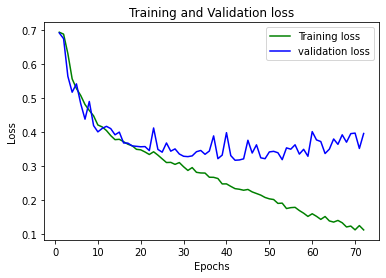

In [20]:
# That's how our loss varied during training
loss_train = history.history['loss']
loss_val = history.history['val_loss']
epochs = range(1,73)
plt.plot(epochs, loss_train, 'g', label='Training loss')
plt.plot(epochs, loss_val, 'b', label='validation loss')
plt.title('Training and Validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

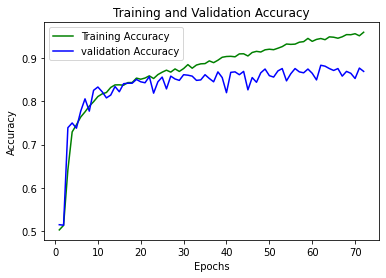

In [21]:
# that's how our accuracy varied during training
accuracy_train = history.history['accuracy']
accuracy_val = history.history['val_accuracy']
epochs = range(1,73)
plt.plot(epochs, accuracy_train, 'g', label='Training Accuracy')
plt.plot(epochs, accuracy_val, 'b', label='validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [22]:
# let's test the model with least validation loss
with open('AnimevsCartoon-model.json', 'r') as json_file:
    json_savedModel= json_file.read()

# load the model architecture 
model = tf.keras.models.model_from_json(json_savedModel)
model.load_weights('animevscartoon_weights.hdf5')
model.compile(optimizer = opt, loss = "sparse_categorical_crossentropy", metrics = ["accuracy"])

In [23]:
predictions = model.predict(X_test)

In [24]:
predict = []
for i in predictions:
    predict.append(np.argmax(i))

In [25]:
from sklearn.metrics import classification_report

In [26]:
print(classification_report(y_test, predict))

              precision    recall  f1-score   support

           0       0.87      0.85      0.86       445
           1       0.86      0.88      0.87       470

    accuracy                           0.87       915
   macro avg       0.87      0.87      0.87       915
weighted avg       0.87      0.87      0.87       915



<AxesSubplot:>

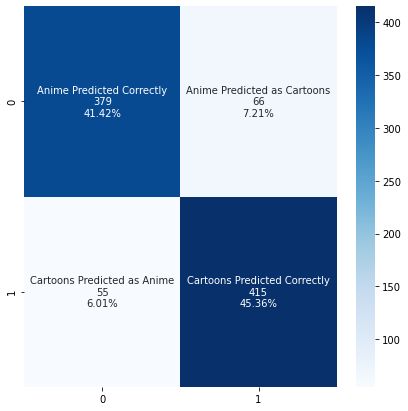

In [27]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

cf_matrix = confusion_matrix(y_test, predict)
plt.figure(figsize = (7,7))

group_names = ['Anime Predicted Correctly','Anime Predicted as Cartoons','Cartoons Predicted as Anime','Cartoons Predicted Correctly']
group_counts = ["{0:0.0f}".format(value) for value in cf_matrix.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in cf_matrix.flatten()/np.sum(cf_matrix)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(cf_matrix, annot=labels, fmt='', cmap='Blues')